In [1]:
# Import relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import time

In [2]:
os.getcwd()

'C:\\Users\\robur\\Documents\\Thesis\\code\\lcfMapping\\markov'

In [3]:
# Read in excel files
pred2015 = pd.read_csv("../../data/output/wurChange/predictions-2015-median.csv")
pred2016 = pd.read_csv("../../data/output/wurChange/predictions-2016-median.csv")
pred2017 = pd.read_csv("../../data/output/wurChange/predictions-2017-median.csv")
pred2018 = pd.read_csv("../../data/output/wurChange/predictions-2018-median.csv")
classes = list(pred2015.columns)

pred2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,2.352941,68.235294,0.000000,29.411765,0.000000,0.0
1,25.327511,6.550218,68.122271,0.000000,0.000000,0.000000,0.0
2,3.947368,23.684211,59.210526,0.000000,0.000000,13.157895,0.0
3,0.000000,8.333333,6.666667,0.000000,75.000000,10.000000,0.0
4,12.987013,14.285714,72.727273,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
30484,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
30485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30487,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0


In [4]:
for i in range(len(classes)):
    print(classes[i])

tree
shrub
grassland
crops
urban_built_up
bare
water


In [8]:
print("2015:", pred2015.iloc[i][j])
print("2016:", pred2016.iloc[i][j])
print("2017:", pred2017.iloc[i][j])
print("2018:", pred2018.iloc[i][j])

2015: 6.55021834061135
2016: 10.1694915254237
2017: 19.672131147541
2018: 20.0


In [ ]:
## Start of Markov chain building

In [ ]:
## Code concept

# Concept of all code
"""
for 1:30.000 points
    
    for 1:7 classes:
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

# Concept of all code with params
"""
pred2015
pred2016
pred2017
pred2018

for 1:30.000 points (i):
    
    pred2015.iloc[i]
    pred2016.iloc[i]
    pred2017.iloc[i]
    pred2018.iloc[i]
    
    for 1:7 classes (j):
        pred2015.iloc[i][j]
        pred2016.iloc[i][j]
        pred2017.iloc[i][j]
        pred2018.iloc[i][j]
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

RF-values:
 2015: 25.3275109170306
 2016: 30.5084745762712
 2017: 34.4262295081967
 2018: 26.0

After smoothing...
 Final node 2015: 27.3275109170306
 Final node 2016: 29.5084745762712
 Final node 2017: 30.4262295081967
 Final node 2018: 28.0 

 Node sim 2015: [25.3, 28.3, 28.3, 27.3, 27.3, 27.3]
 Node sim 2016: [30.5, 31.5, 29.5, 29.5, 29.5, 29.5]
 Node sim 2017: [34.4, 30.4, 30.4, 30.4, 30.4, 30.4]
 Node sim 2018: [26.0, 28.0, 28.0, 28.0, 28.0, 28.0]
 Energy sim [226.4, 64.4, 46.2, 48.0, 48.0, 48.0]


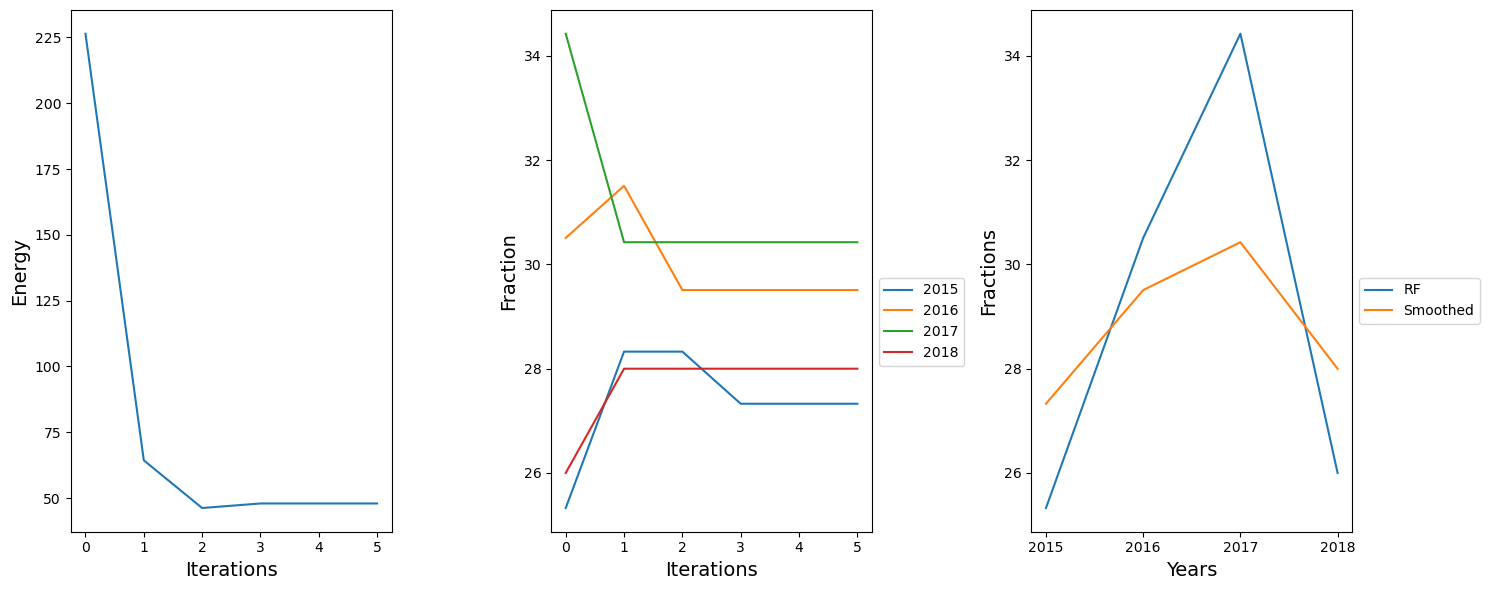

In [10]:
""" 
for 1:7 classes (j):
        pred2015.iloc[i][j]
        pred2016.iloc[i][j]
        pred2017.iloc[i][j]
        pred2018.iloc[i][j]
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

# for 1:7 classes (j):

i=1
j=0

# initialise
rf2015 = pred2015.iloc[i][j]
rf2016 = pred2016.iloc[i][j]
rf2017 = pred2017.iloc[i][j]
rf2018 = pred2018.iloc[i][j]
print("RF-values:")
print(" 2015:", rf2015)
print(" 2016:", rf2016)
print(" 2017:", rf2017)
print(" 2018:", rf2018)

node2015 = rf2015
node2016 = rf2016
node2017 = rf2017
node2018 = rf2018

stepsize = 1
plot = True

nodeSim2015 = []
nodeSim2016 = []
nodeSim2017 = []
nodeSim2018 = []
nodeSim2015.append(node2015)
nodeSim2016.append(node2016)
nodeSim2017.append(node2017)
nodeSim2018.append(node2018)

eTotal = []
eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),(rf2018,node2017))))
e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),(rf2018,node2017)))

for k in range(10):

#     if k == 2:
#         stepsize = 0.1
    
    if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
        break
    
    node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
    nodeSim2015.append(node2015)
    
    node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
    nodeSim2016.append(node2016)
    
    node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
    nodeSim2017.append(node2017)
    
    node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
    nodeSim2018.append(node2018)
    
    nodes = (node2015, node2016, node2017, node2018)
    edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
    e = calc_total_energy(nodes,edges)
    eTotal.append(e)
    

print("\nAfter smoothing...")

print(" Final node 2015:", node2015)
print(" Final node 2016:", node2016)
print(" Final node 2017:", node2017)
print(" Final node 2018:", node2018,"\n")

print(" Node sim 2015:", [round(elem, 1) for elem in nodeSim2015])
print(" Node sim 2016:", [round(elem, 1) for elem in nodeSim2016])
print(" Node sim 2017:", [round(elem, 1) for elem in nodeSim2017])
print(" Node sim 2018:", [round(elem, 1) for elem in nodeSim2018])
print(" Energy sim", [round(elem, 1) for elem in eTotal])

if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)

In [30]:
smooth2015 = []
smooth2016 = []
smooth2017 = []
smooth2018 = []

t0 = time.time()
#for i in range(1000):
for i in range(len(pred2015)):
    listofdicts = []

    for j in classes:
        #i=1
        #print(j)

        # initialise
        rf2015 = pred2015.iloc[i][j]
        rf2016 = pred2016.iloc[i][j]
        rf2017 = pred2017.iloc[i][j]
        rf2018 = pred2018.iloc[i][j]

        node2015 = rf2015
        node2016 = rf2016
        node2017 = rf2017
        node2018 = rf2018

        stepsize = 1
        plot = False

        nodeSim2015 = []
        nodeSim2016 = []
        nodeSim2017 = []
        nodeSim2018 = []
        nodeSim2015.append(node2015)
        nodeSim2016.append(node2016)
        nodeSim2017.append(node2017)
        nodeSim2018.append(node2018)

        eTotal = []
        eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),(rf2018,node2017))))
        e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),(rf2018,node2017)))


        # optimise
        for k in range(10):

            if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
                break

            node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
            nodeSim2015.append(node2015)

            node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
            nodeSim2016.append(node2016)

            node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
            nodeSim2017.append(node2017)

            node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
            nodeSim2018.append(node2018)

            nodes = (node2015, node2016, node2017, node2018)
            edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
            e = calc_total_energy(nodes,edges)
            eTotal.append(e)


        # add to listofdicts
        #dict1 = {}
        dict1 = {"2015": node2015, "2016": node2016, "2017": node2017, "2018": node2018}
        listofdicts.append(dict1)

    # listofdicts to df
    #print(listofdicts)
    #print([dict1["2015"] for dict1 in listofdicts])

    smooth2015.append([dict1["2015"] for dict1 in listofdicts])
    smooth2016.append([dict1["2016"] for dict1 in listofdicts])
    smooth2017.append([dict1["2017"] for dict1 in listofdicts])
    smooth2018.append([dict1["2018"] for dict1 in listofdicts])


# 
#print(smooth2015)
#print(smooth2016)
#print(smooth2017)
#print(smooth2018)
t1 = time.time()
print(t1 - t0)

smooth2015 = pd.DataFrame(smooth2015, columns=classes)
smooth2016 = pd.DataFrame(smooth2016, columns=classes)
smooth2017 = pd.DataFrame(smooth2017, columns=classes)
smooth2018 = pd.DataFrame(smooth2018, columns=classes)

# Replace <0 and >100 values before normalisation
smooth2015[smooth2015 < 0] = 0
smooth2015[smooth2015 > 100] = 100
smooth2016[smooth2016 < 0] = 0
smooth2016[smooth2016 > 100] = 100
smooth2017[smooth2017 < 0] = 0
smooth2017[smooth2017 > 100] = 100
smooth2018[smooth2018 < 0] = 0
smooth2018[smooth2018 > 100] = 100

# TODO: normalise all classes to add up to 100%
smooth2015 = smooth2015.div(smooth2015.sum(axis=1), axis=0) * 100
smooth2016 = smooth2016.div(smooth2016.sum(axis=1), axis=0) * 100
smooth2017 = smooth2017.div(smooth2017.sum(axis=1), axis=0) * 100
smooth2018 = smooth2018.div(smooth2018.sum(axis=1), axis=0) * 100

smooth2015 = smooth2015.replace(np.nan, 0)
smooth2016 = smooth2016.replace(np.nan, 0)
smooth2017 = smooth2017.replace(np.nan, 0)
smooth2018 = smooth2018.replace(np.nan, 0)


#print(smooth2015.sum(axis=1))
print(round(smooth2015.sum(axis=1)).eq(100).all())
print(round(smooth2016.sum(axis=1)).eq(100).all())
print(round(smooth2017.sum(axis=1)).eq(100).all())
print(round(smooth2018.sum(axis=1)).eq(100).all())



112.7323579788208
False
False
False
False


In [31]:
smooth2015.to_csv("../../data/output/markov/smooth2015-basic.csv",index=False)
smooth2016.to_csv("../../data/output/markov/smooth2016-basic.csv",index=False)
smooth2017.to_csv("../../data/output/markov/smooth2017-basic.csv",index=False)
smooth2018.to_csv("../../data/output/markov/smooth2018-basic.csv",index=False)


In [28]:
#sum(smooth2016<0)
print((pred2016 < 0).sum().sum())
print((smooth2016 < 0).sum().sum())
print((smooth2016 > 100).sum().sum(), "\n")
print(((smooth2016 < 0) | (smooth2016 > 100)).sum().sum(), "\n")
#smooth2016[smooth2016 < 0] = 0
#smooth2016[smooth2016 > 100] = 100
print(((smooth2015 < 0) | (smooth2015 > 100)).sum().sum(), "\n")
print(((smooth2016 < 0) | (smooth2016 > 100)).sum().sum(), "\n")
print(((smooth2017 < 0) | (smooth2017 > 100)).sum().sum(), "\n")
print(((smooth2018 < 0) | (smooth2018 > 100)).sum().sum(), "\n")

print(round(smooth2015.sum(axis=1)).eq(100).sum())
print(round(smooth2016.sum(axis=1)).eq(100).sum())
print(round(smooth2017.sum(axis=1)).eq(100).sum())
print(round(smooth2018.sum(axis=1)).eq(100).sum())
print(len(pred2015))

0
0
0 

0 

0 

0 

0 

0 

30460
30460
30460
30460
30489


In [4]:
# optimise_node

def optimise_node(node, edges, stepsize=5):

    # describe edges
    # 2 edges: rf2015 + node2016
    e = calc_energy(node, edges)
    
    # Create empty list to keep track of energy
    eSim = []
    eSim.append(e)
    #print("Initial Energy:", eSim[0])

    #print("Start simulation...")
    node = minimise_energy(node, edges, eSim, stepsize)
    #print("New node:", node)
    #print("Energy:", eSim)
    
    
    return node

In [5]:
def calc_energy(node, edges):
    
    edge1 = edges[0]
    edge2 = edges[1]
    
    e1 = (node - edge1)**2
    e2 = (node - edge2)**2
    
    if len(edges) == 3:
        edge3 = edges[2]
        e3 = (node - edge3)**2
        return e1 + e2 + e3
    
    return e1 + e2


def minimise_energy(node, edges, eSim, stepsize):
    
    i = 0
    #print(i)
    
    if calc_energy(node + stepsize, edges) < eSim[i]:
        node = node + stepsize
        i += 1
        eSim.append(calc_energy(node, edges))
        
        while calc_energy(node + stepsize, edges) < eSim[i]:
            node = node + stepsize
            i += 1
            eSim.append(calc_energy(node,edges))
        
    elif calc_energy(node - stepsize, edges) < eSim[i]:
        node = node - stepsize
        i += 1
        eSim.append(calc_energy(node, edges))
        
        while calc_energy(node - stepsize, edges) < eSim[i]:
            node = node - stepsize
            i += 1
            eSim.append(calc_energy(node, edges))
    
    return node


def calc_total_energy(nodes, edges):
    
    node2015 = nodes[0]
    node2016 = nodes[1]
    node2017 = nodes[2]
    node2018 = nodes[3]
    edges2015 = edges[0]
    edges2016 = edges[1]
    edges2017 = edges[2]
    edges2018 = edges[3]
    
    e2015 = calc_energy(node2015, edges2015)
    e2016 = calc_energy(node2016, edges2016)
    e2017 = calc_energy(node2017, edges2017)
    e2018 = calc_energy(node2018, edges2018)
    
    return e2015 + e2016 + e2017 + e2018
    

In [6]:
def plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018):

    # Plot energy over iterations
    xs = [x for x in range(len(eTotal))]
    plt.figure(figsize=(15,6), dpi= 100)
    plt.subplot(1, 3, 1)
    plt.plot(xs, eTotal)
    plt.ylabel('Energy', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)

    # Plot nodes over iterations
    xs = [x for x in range(len(nodeSim2015))]
    plt.subplot(1, 3, 2)
    plt.plot(xs, nodeSim2015)
    plt.plot(xs, nodeSim2016)
    plt.plot(xs, nodeSim2017)
    plt.plot(xs, nodeSim2018)
    plt.ylabel('Fraction', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)
    plt.legend(["2015","2016","2017","2018"], loc="upper left", bbox_to_anchor=(1, 0.5))

    xs = ["2015","2016","2017","2018"]
    yRF = [rf2015,rf2016,rf2017,rf2018]
    yNode = [node2015,node2016,node2017,node2018]
    plt.subplot(1, 3, 3)
    plt.plot(xs, yRF)
    plt.plot(xs, yNode)
    plt.ylabel('Fractions', fontsize=14)
    plt.xlabel('Years', fontsize=14)
    plt.legend(["RF","Smoothed"], loc="upper left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()